In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Creating the dataset

In [2]:
batch_size = 32
img_size = 180
data_dir = "./Chess"

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (img_size, img_size),
    batch_size = batch_size)

Found 552 files belonging to 6 classes.
Using 442 files for training.


2021-12-03 17:53:35.230323: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_size, img_size),
    batch_size = batch_size)

Found 552 files belonging to 6 classes.
Using 110 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']


Building A Neural Network Model

In [7]:
num_classes = len(class_names)

data_augmentation = keras.Sequential(
    [layers.RandomFlip("horizontal"), layers.RandomRotation(0.1),]
)

base_model = keras.applications.VGG19(
    weights="imagenet",
    input_shape=(img_size, img_size, 3),
    include_top=False,
) 

base_model.trainable = False

inputs = keras.Input(shape=(img_size, img_size, 3))
x = data_augmentation(inputs)

scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
x = scale_layer(x)

x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(512, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(512, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(num_classes, activation="softmax")(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 vgg19 (Functional)          (None, 5, 5, 512)         20024384  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                             

In [8]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break
for image_batch, labels_batch in val_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)


In [8]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])


In [9]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/10
14/14 [==============================] - 33s 2s/step - loss: 1.9025 - accuracy: 0.1900 - val_loss: 1.6838 - val_accuracy: 0.3091
Epoch 2/10
14/14 [==============================] - 49s 3s/step - loss: 1.7085 - accuracy: 0.2941 - val_loss: 1.5230 - val_accuracy: 0.4091
Epoch 3/10
14/14 [==============================] - 52s 4s/step - loss: 1.5217 - accuracy: 0.4163 - val_loss: 1.3519 - val_accuracy: 0.5636
Epoch 4/10
14/14 [==============================] - 52s 4s/step - loss: 1.3246 - accuracy: 0.5226 - val_loss: 1.1787 - val_accuracy: 0.6000
Epoch 5/10
14/14 [==============================] - 52s 4s/step - loss: 1.2395 - accuracy: 0.5475 - val_loss: 1.0003 - val_accuracy: 0.6909
Epoch 6/10
14/14 [==============================] - 54s 4s/step - loss: 1.0943 - accuracy: 0.5905 - val_loss: 0.9033 - val_accuracy: 0.6545
Epoch 7/10
14/14 [==============================] - 54s 4s/step - loss: 0.9697 - accuracy: 0.6290 - val_loss: 0.8529 - val_accuracy: 0.6636
Epoch 8/10
14/14 [==

In [9]:
base_model.trainable = True

model.summary()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(1e-5),
              metrics=["accuracy"])

epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

<>:6: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<>:6: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
/var/folders/6l/lcnx9yy53dvcmny85sxv3tjr0000gn/T/ipykernel_2129/3780607912.py:6: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  optimizer="adam"(1e-5),


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 vgg19 (Functional)          (None, 5, 5, 512)         20024384  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                             

TypeError: 'str' object is not callable

In [ ]:
accuracy = history.history['accuracy']
print(accuracy)

[0.15837104618549347, 0.26923078298568726, 0.42081448435783386, 0.46832579374313354, 0.5067873597145081, 0.6289592981338501, 0.6018099784851074, 0.6289592981338501, 0.6402714848518372, 0.662895917892456]


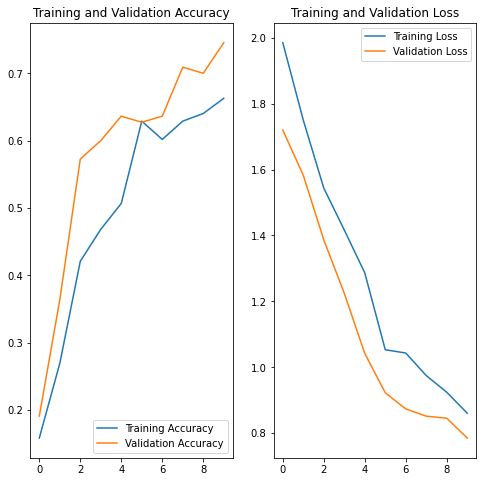

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
